In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel, RBF, RationalQuadratic

/Users/dkobayas/Work/pymisc/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [76]:
x1 = np.random.rand(100)*10 + 10
x2 = np.random.randn(100) + 100
x3 = np.random.rand(100)*20 + 20
x4 = np.linspace(1,100,100)
y = (0.1*x4)/x2**2 + 10*x3**3

data = pd.DataFrame([x1, x2, x3, x4, y]).T
data.columns = ['x1', 'x2', 'x3', 'x4', 'y']

X = data.drop(['y'], axis=1)
y = data['y']

In [83]:
kernels = [
    1.0 * RBF() + WhiteKernel(),
    1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1) + WhiteKernel(),
    1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),nu=1.5) + WhiteKernel(),
    1.0 * RBF() + 1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),nu=1.5) + WhiteKernel(),
]
gp = GaussianProcessRegressor(kernels[3])
gp.fit(X.values, y.values)

The optimal value found for dimension 0 of parameter k1__k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k1__k2__k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1) + 1**2 * Matern(length_scale=1, nu=1.5) + WhiteKernel(noise_level=1))

X has feature names, but GaussianProcessRegressor was fitted without feature names


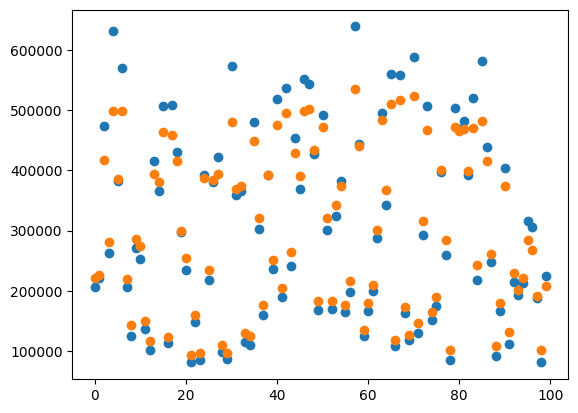

In [84]:
plt.scatter(X.index, y)
plt.scatter(X.index, gp.predict(X))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 30.00it/s]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


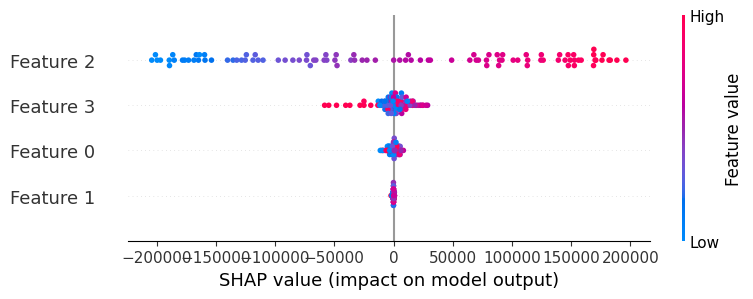

In [85]:
explainer = shap.KernelExplainer(gp.predict, X.values)
shap_values = explainer.shap_values(X.values)
shap.summary_plot(shap_values, X.values)